In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df=pd.read_csv("task1.csv")

# display the some rows of dataset
print(df.head())

   Age  Gender Income_Level Education_Level Employment_Status Marital_Status  \
0   56  Female       Medium        Bachelor          Employed         Single   
1   69  Female         High     High School     Self-Employed         Single   
2   46  Female       Medium     High School          Employed         Single   
3   32    Male       Medium          Master        Unemployed         Single   
4   60  Female          Low        Bachelor          Employed         Single   

   Number_of_Children Housing_Type  Monthly_Expenditure Health_Condition  \
0                   1       Rented                 3219        Excellent   
1                   0        Owned                 4008             Good   
2                   3        Owned                 4241             Good   
3                   1        Owned                 2074             Good   
4                   0        Owned                 4498             Good   

  Favorite_Hobby  
0        Reading  
1          Music  
2    

In [18]:
# shape of the dataset
print("shape of dataset is :",df.shape)
print("columns :",df.columns.tolist(),"\n")

# Identify numerical features in the dataset
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features in the dataset:")
print(numerical_features)



shape of dataset is : (3000, 11)
columns : ['Age', 'Gender', 'Income_Level', 'Education_Level', 'Employment_Status', 'Marital_Status', 'Number_of_Children', 'Housing_Type', 'Monthly_Expenditure', 'Health_Condition', 'Favorite_Hobby'] 

Numerical features in the dataset:
['Age', 'Number_of_Children', 'Monthly_Expenditure']


In [19]:
# preprocessing and data cleaing
print("check Null values in data set :",df.isnull().sum())

# check for duplicates 
print("Duplicates :",df.duplicated().sum())


check Null values in data set : Age                    0
Gender                 0
Income_Level           0
Education_Level        0
Employment_Status      0
Marital_Status         0
Number_of_Children     0
Housing_Type           0
Monthly_Expenditure    0
Health_Condition       0
Favorite_Hobby         0
dtype: int64
Duplicates : 0


In [22]:
# Step 2: Summary Statistics and Initial Insights
print("\nSummary Statistics:")
display(df.describe(include='all'))

print("\nDataset Information:")
df.info()


Summary Statistics:


,Age,Gender,Income_Level,Education_Level,Employment_Status,Marital_Status,Number_of_Children,Housing_Type,Monthly_Expenditure,Health_Condition,Favorite_Hobby
count,3000.000000,3000,3000,3000,3000,3000,3000.000000,3000,3000.000000,3000,3000
unique,NaN,3,3,4,4,4,NaN,3,NaN,4,6
top,NaN,Female,Low,Bachelor,Employed,Single,NaN,Rented,NaN,Good,Traveling
freq,NaN,1529,1011,766,788,801,NaN,1508,NaN,792,543
mean,49.407667,NaN,NaN,NaN,NaN,NaN,2.463667,NaN,5296.072000,NaN,NaN
std,18.260557,NaN,NaN,NaN,NaN,NaN,1.682148,NaN,2652.846951,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,501.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2965.250000,NaN,NaN
50%,49.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,5168.500000,NaN,NaN
75%,66.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,7595.750000,NaN,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  3000 non-null   int64 
 1   Gender               3000 non-null   object
 2   Income_Level         3000 non-null   object
 3   Education_Level      3000 non-null   object
 4   Employment_Status    3000 non-null   object
 5   Marital_Status       3000 non-null   object
 6   Number_of_Children   3000 non-null   int64 
 7   Housing_Type         3000 non-null   object
 8   Monthly_Expenditure  3000 non-null   int64 
 9   Health_Condition     3000 non-null   object
 10  Favorite_Hobby       3000 non-null   object
dtypes: int64(3), object(8)
memory usage: 257.9+ KB


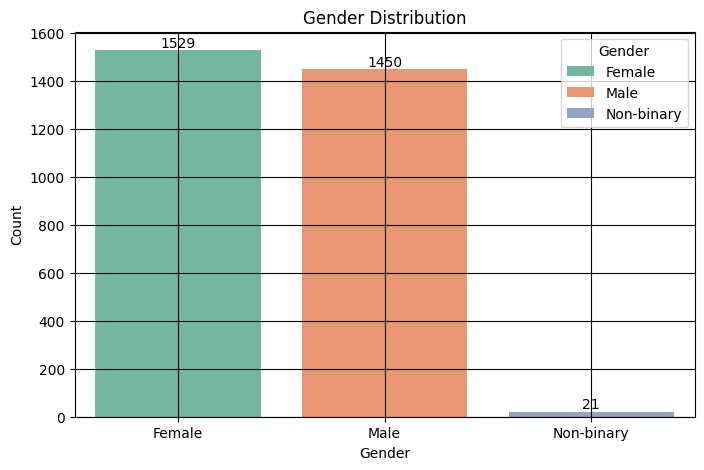

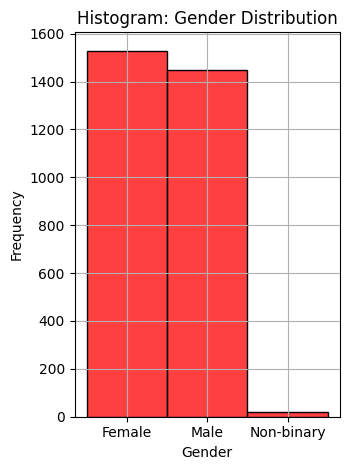

In [35]:
# Step 3: Bar Chart for Categorical Variable (Gender Distribution)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', hue='Gender', dodge=False, palette='Set2',color='skyblue')

# Annotate the bars with their counts
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Explicitly set the legend labels
gender_labels = df['Gender'].unique()
plt.legend(title='Gender', labels=gender_labels)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True,color='black')
plt.show()



plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=df, x='Gender', kde=False, bins=len(df['Gender'].unique()), color='red')
plt.title('Histogram: Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.grid(True)
plt.show()

The bar chart and Histogram visually represents the gender distribution in the dataset, highlighting the count of males and females. This insight helps identify the balance or disparity between genders, aiding demographic analysis

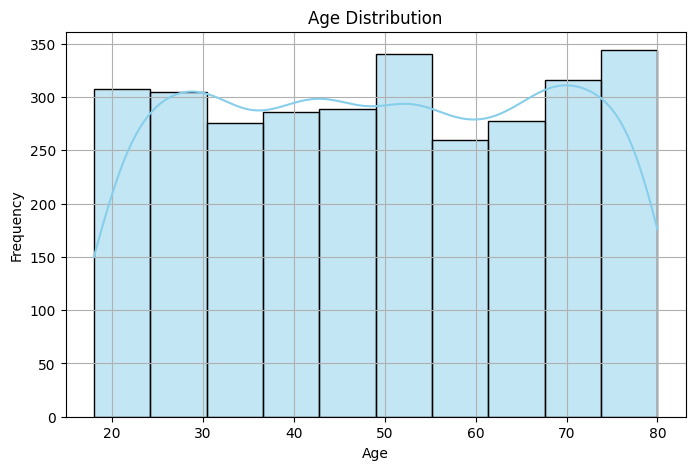

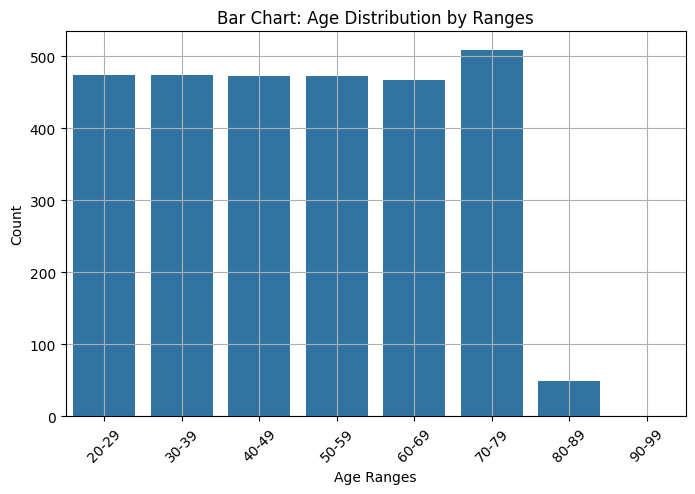

In [45]:

# Histogram for Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Frequency')
plt.show()


# Bar Chart for Age Distribution
bins = range(20, 101, 10)  # Create bins from 20 to 100 with a step of 10
labels = [f"{b}-{b+9}" for b in bins[:-1]]  # Generate labels like '20-29', '30-39', etc.

# Bin the Age column
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences for each age range
age_counts = df['Age Range'].value_counts().sort_index()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, hue=None, legend=False)
plt.title('Bar Chart: Age Distribution by Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [46]:
#Insights:
#Histogram: Gives a smoothed view of the continuous variable, showing density and frequency.
#Bar Chart: Aggregates data into distinct bins (age ranges), making it easier to interpret group counts directly.

# Based on the analysis of the bar chart and histogram:Gender Distribution: The number of females in the dataset is higher compared to males, indicating a gender imbalance.,Age Distribution: The age group of 70–79 years has the highest representation, highlighting a concentration of individuals in this age range.This insight provides a clear understanding of demographic trends within the dataset.